In [4]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import numpy as np

In [5]:
url_link=('https://api.cryptonator.com/api/full/btc-usd')  #save the link to a variable "url_link"

In [6]:
markets=requests.get(url_link).json()['ticker']['markets']  #EXTRACTING THE MARKETS OF THE GIVEN COIN FROM DATA

In [7]:
data=pd.DataFrame(markets)                                 #MAKING DATA FRAME OF MARKETS

In [8]:
data                                                       #DISPLAYING THE DATA FRAME

,market,price,volume
0,BitFinex,9170.00000000,53896.593233
1,Bitstamp,9182.80000000,12630.679583
2,Bittrex,9200.00000000,4283.515111
3,C-Cex,9850.00000000,1.335154
4,Cex.io,9417.00000000,1581.908589
5,Exmo,9594.00000000,1250.594031
6,Hitbtc,9360.85000000,5340.030000
7,Kraken,9172.80000000,10177.772199
8,Livecoin,9601.00000000,1365.415642
9,Poloniex,9169.99999999,3477.916399


In [9]:
labels=np.array(data['market'].values)                   #STORING THE MARKET NAMES IN LABELS ADDING .VALUES AT THE END TO GET VALUES  
prices=np.array((data['price']).values,dtype='float64')  #AND CONVERTING THE IN ARRAYS USING NUMPY OF DATA TYPE FLOAT64
volumes=np.array(data['volume'].values,dtype='float64')
labels

array(['BitFinex', 'Bitstamp', 'Bittrex', 'C-Cex', 'Cex.io', 'Exmo',
       'Hitbtc', 'Kraken', 'Livecoin', 'Poloniex', 'wexnz', 'YoBit'],
      dtype=object)

In [10]:
prices

array([9170.        , 9182.8       , 9200.        , 9850.        ,
       9417.        , 9594.        , 9360.85      , 9172.8       ,
       9601.        , 9169.99999999, 9296.38      , 9886.11712   ])

In [11]:
volumes

array([5.38965932e+04, 1.26306796e+04, 4.28351511e+03, 1.33515442e+00,
       1.58190859e+03, 1.25059403e+03, 5.34003000e+03, 1.01777722e+04,
       1.36541564e+03, 3.47791640e+03, 8.92038080e+02, 1.17944337e+02])

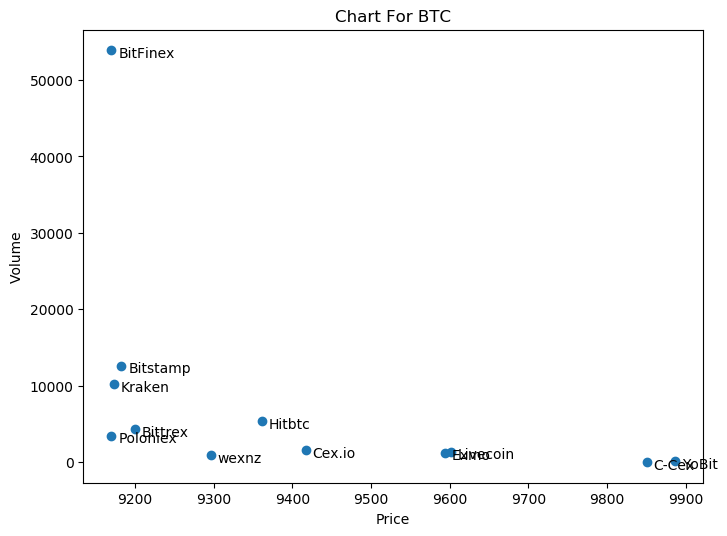

In [12]:
plt.figure(num=None, figsize=(8, 6), dpi=100)     #ADJUSTING THE DIMESSNSION OF CHART
plt.scatter(prices,volumes)                       #PLOTTING SCATTER PLOT 

for label,price,volume in zip(labels,prices,volumes):  #NOW LABELLING EACH VALUE BY ITERATION THROUGH FOR LOOP
    plt.annotate(label,
                xy=(price,volume),
                xytext=(5,-5),
                textcoords='offset points',fontsize=10)

plt.xlabel('Price')
plt.ylabel('Volume')
plt.title('Chart For BTC')
plt.show()

In [13]:
highest_price=np.max(prices)                #FINDING THE MAXIMUM VALUE IN THE PRICE COULMN
lowest_price=np.min(prices)                 #FINDING THE MINIMUM VALUE IN THE PRICE COULMN
highest_market=labels[np.argmax(prices)]    #ARGMAX WILL GIVE THE INDEX OF LARGEST VALUE AND THEN IT WILL STORED
lowest_market=labels[np.argmin(prices)]     #ARGMIN WILL GIVE THE INDEX OF SMALLEST VALUE AND THEN IT WILL STORED

In [14]:
highest_market

'YoBit'

In [15]:
highest_price

9886.11712

In [16]:
lowest_market

'Poloniex'

In [17]:
lowest_price

9169.99999999

In [18]:
difference=np.float64(highest_price)-np.float64(lowest_price)   #IT WILL GIVE THE DIFFERENCE OR THE PROFIT

In [19]:
difference

716.1171200100016

In [20]:
#    IT WILL BE GREAT TO DESIGN A FUNCTION FOR THE PROGRAM INSTEAD OF WRITING IT IN INDIVIDUAL CELLS
#    SUMMING ALL THE ABOVE CODE IN THE ARBITRAGE FUNCTION

Enter Coin Symbol: neo


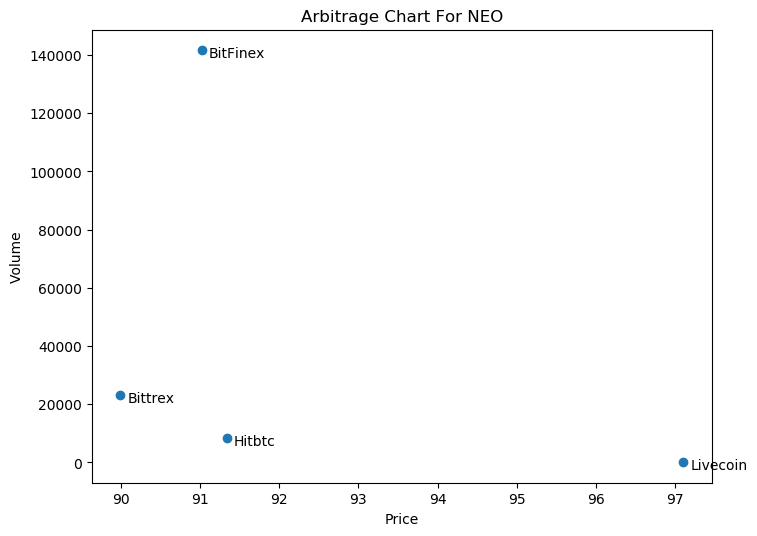

*You can buy NEO from Bittrex at 89.99899998 dollar
*And can sell at Livecoin at 97.09999 dollar
*And can get a profit of  7.100990020000012 at a percentage of 7.890076580382035


In [21]:
def Arbitrage_of_Coin():
    coin_symbol=input("Enter Coin Symbol: ").lower()
    
    url_link=('https://api.cryptonator.com/api/full/{}-usd'.format(coin_symbol))
    try:
        markets=requests.get(url_link).json()['ticker']['markets']
    except (KeyError,ValueError,TypeError):
        print("Data Not not found")
        print('Enter Correct Symbol')
        Arbitrage_of_Coin()
    
    data=pd.DataFrame(markets)
    labels=np.array(data['market'].values)
    prices=np.array((data['price']).values,dtype='float64')
    volumes=np.array(data['volume'].values,dtype='float64')
    plt.figure(num=None, figsize=(8, 6), dpi=100)
    plt.scatter(prices,volumes)

    for label,price,volume in zip(labels,prices,volumes):
        plt.annotate(label,
                    xy=(price,volume),
                    xytext=(5,-5),
                    textcoords='offset points',fontsize=10)
    plt.xlabel('Price')
    plt.ylabel('Volume')
    plt.title('Arbitrage Chart For {}'.format(coin_symbol.upper()))
    plt.show()
    highest_price=np.max(prices)
    lowest_price=np.min(prices)
    highest_market=labels[np.argmax(prices)]
    lowest_market=labels[np.argmin(prices)]
    difference=np.float64(highest_price)-np.float64(lowest_price)
    percentage=(difference/lowest_price)*100
    print('*You can buy {} from {} at {} dollar'.format(coin_symbol.upper(),lowest_market,lowest_price))
    print('*And can sell at {} at {} dollar'.format(highest_market,highest_price))
    print('*And can get a profit of ',str(difference)+' at a percentage of',str(percentage))
Arbitrage_of_Coin()